# Outline

## Intro to GANs:
* What motivated their creation?

## How do they work?
* Explanation of discriminator-generator architecture and how each is trained.
* Go through an example architecture

## Results from DCGAN


## Semi-Supervised Learning


## Advances 
* Scoring GANs - Inception score




# Intro to GANs

#### Hide

In [3]:
from IPython.display import HTML
style = """
<style>
.expo {
  line-height: 150%;
}

.visual {
  height: 400px;
  width: 400px;
}

.red {
  color: red;
  display:inline;
}

.blue {
  color: blue;
  display:inline;
}

.green {
  color: green;
  display:inline;
}

</style>
"""
HTML(style)

## Definition

"GAN" stands for "<span class='blue'>Generative</span> <span class='green'>Adversarial</span> <span class='red'>Network</span>". 

They are a method of training <span class='red'> neural networks</span> to <span class='blue'>generate</span> images similar to those in the data the neural network is trained on. 

This training is done via an <span class='green'>adversarial</span> process.

### Basic example

![](img/mnist_gan_8s.png)

Not digits written by a human. Generated by a neural network.

### Cutting edge example, October 2017

![](img/progressive_gan_example.png)

Not real people: images generated by a neural network.

## [Yann LeCunn](http://yann.lecun.com) quote

> "[GANs], and the variations that are now being proposed, are the most interesting idea in the last 10 years in ML [machine learning], in my opinion." 

-- Yann LeCunn, Director of AI Research at Facebook, [in 2016 on Quora](https://www.quora.com/What-are-some-recent-and-potentially-upcoming-breakthroughs-in-deep-learning/answer/Yann-LeCun)

## What are GANs - in fact, what in the heck are neural networks?

We've all seen diagrams like this when trying to understand neural nets:

![](img/neural_network_diagram.png)

That makes sense...kinda.

### What are neural nets: mathematically:

_Mathematically_, neural nets are:

* Universal function approximators
* Nested functions
* Differentiable

What does differentiable mean? It means that if our neural net is defined by some big function $N$ that:

* Takes in some input $X$
* Some weights $W$
* Does a bunch of transformations to these that results in a prediction
* This prediction can then be compared to some "true value" $Y$, resulting in a loss $L$

So we could have an equation like:

$$(N(X, W) - Y)^2 = L$$

If we were using mean squared error loss.

_Differentiable_ means that we can figure out how to reduce this loss by computing:

$$ \frac{\partial L}{\partial W} $$

And updating all the weights in $W$ according to this gradient.

**In addition**, differentiability means we can compute:

$$ \frac{\partial L}{\partial X} $$

In other words, how much the loss would change if the individual pixels of the _input_ changed.

_This_ turns out to be the key fact that allows GANs to work.

## Ok, now I understand neural nets a little better: what about GANs?

Let's first cover how GANs were invented.

## Who invented them?

This guy:

<img src="img/goodfellow.png" class="visual">

### Speech synthesis contest

In 2013, Ian Goodfellow (inventor of GANs, then a grad student at the University of Montreal) and Yoshua Bengio (one of the leading researchers on neural networks in the world) are about to run a speech synthesis contest.

Their idea is to have a "discriminator network" that could listen to artificially generated speech and decide if it was real or not. 

They decide not to run the contest, concluding that people will just game the system by generating examples that will fool _this particular_ discriminator network, rather than trying to produce _generally_ good speech.

### The insight

Then, Ian Goodfellow was in a bar one night, and asked the question: **can this be fixed by the _discriminator network_ learning**?

## How GANs work:

Idea: ultimately, we want to train a generator network that will generate good images; images that can fool a _good_ discriminator network.

## Part 1

### Step 1

Generate a random noise vector and feed it through a neural network.

![](img/gan_1.png)

Let's denote the matrix of pixels in this image $X$.

### Step 2

Then, feed this image (matrix of pixels $X$) into a second network and get a prediction $P$.

![](img/gan_2.png)

Compare the prediction $P$ to the actual value of **0**, since we want the discriminator to output 0 each time it sees a fake image.

### Step 3

Critically, also compute $$ \frac{\partial L}{\partial X} $$ how much each of the _pixels generated_ affects the loss.

### Step 4

Then, update the first network, called the **generator**, with $$ -\frac{\partial L}{\partial X} $$.

negative because we want the generator to be continually making the discriminator _more_ likely to say that the images it is generating are real.

### Step 5

![](img/gan_3.png)

Finally, generate a _new_ random noise vector $Z$, and repeat the process, so that the generator will learn to turn _any_ random noise vector into an image that the discriminator thinks is real.

## Part 2

### What's missing?

This will train the generator to generate good fake images, but it will likely result in the discriminator not being a very smart classifier since we only gave it one of the two classes it is trying to classify - that is, only fake images, and no real images. 

![](img/gan_4.png)

So, we'll have to give it real images as well.

## Description from original paper

Quote from the original paper on GANs:

> "The generative model can be thought of as analogous to a team of counterfeiters, trying to produce fake currency and use it without detection, while the discriminative model is analogous to the police, trying to detect the counterfeit currency. Competition in this game drives both teams to improve their methods until the counterfeits are indistinguishable from the genuine articles." 

-Goodfellow et. al., "Generative Adversarial Networks" (2014)

## Another way to look at GANs

We can also look at GANs as approximating a distribution an $N$-dimensional space, where $N$ is the number of pixels in the input images.

### Code of the first GAN ever:

This is the [Original GitHub repo with Ian Goodfellow's code](https://github.com/goodfeli/galatea/commit/d960968919b0856ba6753198a0e035228d7c03e6) that he used to generate MNIST digits back in 2014.

## Let's code one up!

Note: code from Udacity's Deep Learning Foundations Nanodegree. GitHub [here](https://github.com/udacity/deep-learning).

In [4]:
%matplotlib inline

import pickle as pkl
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [5]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data')

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [9]:
def model_inputs(real_dim, z_dim):
    inputs_real = tf.placeholder(tf.float32, (None, real_dim), name='input_real') 
    inputs_z = tf.placeholder(tf.float32, (None, z_dim), name='input_z')
    
    return inputs_real, inputs_z

In [10]:
def generator(z, out_dim, n_units=128, reuse=False, alpha=0.01):
    with tf.variable_scope('generator', reuse=reuse):
        # Hidden layer
        h1 = tf.layers.dense(z, n_units, activation=None)
        
        # Leaky ReLU
        h1 = tf.maximum(alpha * h1, h1)
        
        # Logits and tanh output
        logits = tf.layers.dense(h1, out_dim, activation=None)
        out = tf.tanh(logits)
        
        return out

In [11]:
def discriminator(x, n_units=128, reuse=False, alpha=0.01):
    with tf.variable_scope('discriminator', reuse=reuse):
        # Hidden layer
        h1 = tf.layers.dense(x, n_units, activation=None)
        # Leaky ReLU
        h1 = tf.maximum(alpha * h1, h1)
        
        logits = tf.layers.dense(h1, 1, activation=None)
        out = tf.sigmoid(logits)
        
        return  out, logits

In [12]:
# Size of input image to discriminator
input_size = 784

# Size of latent vector to generator
z_size = 100

# Sizes of hidden layers in generator and discriminator
g_hidden_size = 128
d_hidden_size = 128

# Leak factor for leaky ReLU
alpha = 0.01

# Smoothing
smooth = 0.1

In [13]:
tf.reset_default_graph()
# Create our input placeholders
input_real, input_z = model_inputs(input_size, z_size)

# Build the model
g_model = generator(input_z, input_size, n_units=g_hidden_size, alpha=alpha)
# g_model is the generator output

d_model_real, d_logits_real = discriminator(input_real, n_units=d_hidden_size, alpha=alpha)
d_model_fake, d_logits_fake = discriminator(g_model, reuse=True, n_units=d_hidden_size, alpha=alpha)

In [14]:
# Calculate losses
d_loss_real = tf.reduce_mean(
                  tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real, 
                                                          labels=tf.ones_like(d_logits_real) * (1 - smooth)))
d_loss_fake = tf.reduce_mean(
                  tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, 
                                                          labels=tf.zeros_like(d_logits_real)))
d_loss = d_loss_real + d_loss_fake

g_loss = tf.reduce_mean(
             tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake,
                                                     labels=tf.ones_like(d_logits_fake)))

In [15]:
# Optimizers
learning_rate = 0.002

# Get the trainable_variables, split into G and D parts
t_vars = tf.trainable_variables()
g_vars = [var for var in t_vars if var.name.startswith('generator')]
d_vars = [var for var in t_vars if var.name.startswith('discriminator')]

d_train_opt = tf.train.AdamOptimizer(learning_rate).minimize(d_loss, var_list=d_vars)
g_train_opt = tf.train.AdamOptimizer(learning_rate).minimize(g_loss, var_list=g_vars)

In [20]:
batch_size = 100
epochs = 10

samples = []
losses = []

# Only save generator variables
saver = tf.train.Saver(var_list=g_vars)
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for e in range(epochs):
        for ii in range(mnist.train.num_examples//batch_size):
            batch = mnist.train.next_batch(batch_size)
            
            # Get images, reshape, and rescale for passing to D
            batch_images = batch[0].reshape((batch_size, 784))
            batch_images = batch_images*2 - 1
            
            # Sample random noise for G
            batch_z = np.random.uniform(-1, 1, size=(batch_size, z_size))
            
            # Run optimizers
            _ = sess.run(d_train_opt, feed_dict={input_real: batch_images, input_z: batch_z})
            _ = sess.run(g_train_opt, feed_dict={input_z: batch_z})
            
        # At the end of each epoch, get the losses and print them out
        train_loss_d = sess.run(d_loss, {input_z: batch_z, input_real: batch_images})
        train_loss_g = g_loss.eval({input_z: batch_z})
        
        print("Epoch {}/{}...".format(e+1, epochs),
              "Discriminator Loss: {:.4f}...".format(train_loss_d), 
              "Generator Loss: {:.4f}".format(train_loss_g))
        
        # Save losses to view after training
        losses.append((train_loss_d, train_loss_g))
        
        # Sample from generator as we're training to view afterwards
        sample_z = np.random.uniform(-1, 1, size=(16, z_size))
        gen_samples = sess.run(
            generator(input_z, input_size, n_units=g_hidden_size, reuse=True, alpha=alpha),
            feed_dict={input_z: sample_z})
        samples.append(gen_samples)
        saver.save(sess, './checkpoints/generator.ckpt')

# Save training generator samples
with open('train_samples.pkl', 'wb') as f:
    pkl.dump(samples, f)              

Epoch 1/10... Discriminator Loss: 0.3584... Generator Loss: 4.4215
Epoch 2/10... Discriminator Loss: 0.4755... Generator Loss: 2.4893
Epoch 3/10... Discriminator Loss: 0.6216... Generator Loss: 5.7858
Epoch 4/10... Discriminator Loss: 0.8900... Generator Loss: 5.7373
Epoch 5/10... Discriminator Loss: 0.6162... Generator Loss: 4.1719
Epoch 6/10... Discriminator Loss: 1.4757... Generator Loss: 4.6816
Epoch 7/10... Discriminator Loss: 1.4308... Generator Loss: 1.9184
Epoch 8/10... Discriminator Loss: 1.5779... Generator Loss: 1.3325
Epoch 9/10... Discriminator Loss: 2.7715... Generator Loss: 1.2495
Epoch 10/10... Discriminator Loss: 1.4889... Generator Loss: 1.9892


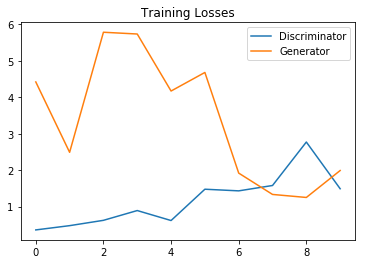

In [21]:
fig, ax = plt.subplots()
losses = np.array(losses)
plt.plot(losses.T[0], label='Discriminator')
plt.plot(losses.T[1], label='Generator')
plt.title("Training Losses")
plt.legend();

In [22]:
def view_samples(epoch, samples):
    fig, axes = plt.subplots(figsize=(7,7), nrows=4, ncols=4, sharey=True, sharex=True)
    for ax, img in zip(axes.flatten(), samples[epoch]):
        ax.xaxis.set_visible(False)
        ax.yaxis.set_visible(False)
        im = ax.imshow(img.reshape((28,28)), cmap='Greys_r')
    
    return fig, axes

In [23]:
# Load samples from generator taken while training
with open('train_samples.pkl', 'rb') as f:
    samples = pkl.load(f)

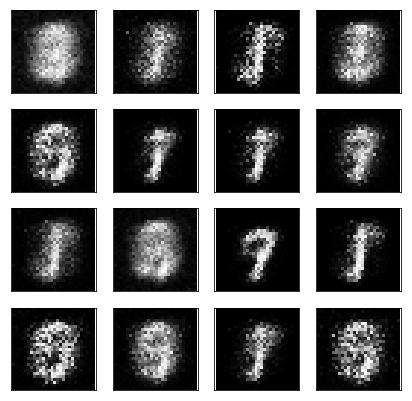

In [24]:
_ = view_samples(-1, samples)

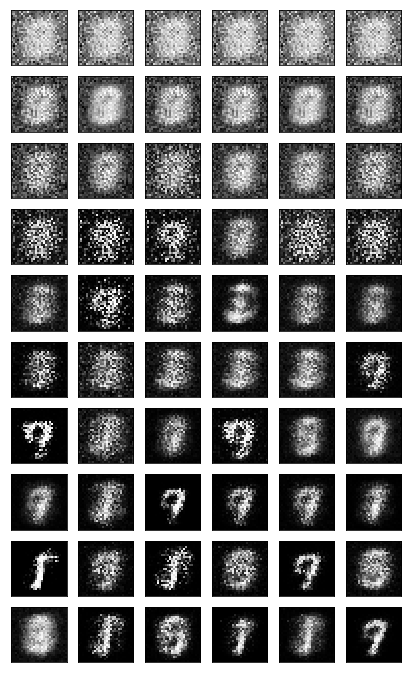

In [25]:
rows, cols = 10, 6
fig, axes = plt.subplots(figsize=(7,12), nrows=rows, ncols=cols, sharex=True, sharey=True)

for sample, ax_row in zip(samples[::int(len(samples)/rows)], axes):
    for img, ax in zip(sample[::int(len(sample)/cols)], ax_row):
        ax.imshow(img.reshape((28,28)), cmap="Greys_r")
        ax.xaxis.set_visible(False)
        ax.yaxis.set_visible(False)

INFO:tensorflow:Restoring parameters from checkpoints/generator.ckpt


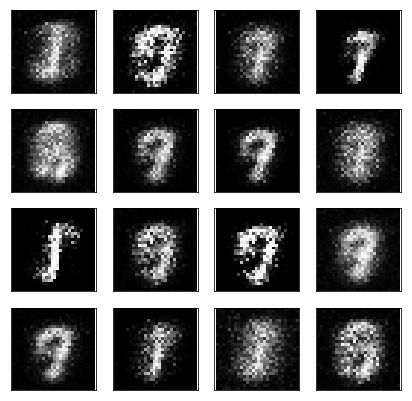

In [26]:
saver = tf.train.Saver(var_list=g_vars)
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('checkpoints'))
    sample_z = np.random.uniform(-1, 1, size=(16, z_size))
    gen_samples = sess.run(
        generator(input_z, input_size, n_units=g_hidden_size, reuse=True, alpha=alpha), 
        feed_dict={input_z: sample_z})
_ = view_samples(0, [gen_samples])

# Some architectures you should know about

## Original GAN (mid-2014)

[The original code from Ian Goodfellow's repo on GANs](https://github.com/goodfeli/galatea/commit/d960968919b0856ba6753198a0e035228d7c03e6)

Note: In this original paper, there was not a convolutional or deconvolutional architecture used. They tested a very shallow convolutional/deconvolutional architecture on the CIFAR-10 data, but didn't explore this idea further.

## DCGAN (mid 2015)

This paper introduced many concepts that pushed GANs forward:

* Deep Convolutional/Deconvolutional architecture
* Batch normalization (which had been invented earlier in 2015) first applied to GANs

Crazy fact: the lead author of the DCGAN paper (Alec Radford) was still in college when it was published.

## DCGAN Results

Which of these five bedrooms do you think are real?

![](img/gan_bedrooms.png)

Smooth transitions in the latent (100-dimensional input to generator) space:

![](img/dcgan_smooth_transition.png)

Filters learned by the last layer of the discriminator:

<img src="img/dcgan_filters.png" class="visual">

Arithmetic in the latent space:

![](img/dcgan_arithmetic.png)

# DCGAN: Deep Convolutional Architecture

DCGAN accomplished these feats using a _deep convolutional architecture_. Here are example generator and discriminator functions from that architecture.

```python
def generator(z, output_dim, reuse=False, alpha=0.2, training=True):
    with tf.variable_scope('generator', reuse=reuse):
        # First fully connected layer
        x1 = tf.layers.dense(z, 4*4*512)
        # Reshape it to start the convolutional stack
        x1 = tf.reshape(x1, (-1, 4, 4, 512))
        x1 = tf.layers.batch_normalization(x1, training=training)
        x1 = tf.maximum(alpha * x1, x1)
        # 4x4x512 now
        
        x2 = tf.layers.conv2d_transpose(x1, 256, 5, strides=2, padding='same')
        x2 = tf.layers.batch_normalization(x2, training=training)
        x2 = tf.maximum(alpha * x2, x2)
        # 8x8x256 now
        
        x3 = tf.layers.conv2d_transpose(x2, 128, 5, strides=2, padding='same')
        x3 = tf.layers.batch_normalization(x3, training=training)
        x3 = tf.maximum(alpha * x3, x3)
        # 16x16x128 now
        
        # Output layer
        logits = tf.layers.conv2d_transpose(x3, output_dim, 5, strides=2, padding='same')
        # 32x32x3 now
        
        out = tf.tanh(logits)
        
        return out
```

```python
def discriminator(x, reuse=False, alpha=0.2):
    with tf.variable_scope('discriminator', reuse=reuse):
        # Input layer is 32x32x3
        x1 = tf.layers.conv2d(x, 64, 5, strides=2, padding='same')
        relu1 = tf.maximum(alpha * x1, x1)
        # 16x16x64
        
        x2 = tf.layers.conv2d(relu1, 128, 5, strides=2, padding='same')
        bn2 = tf.layers.batch_normalization(x2, training=True)
        relu2 = tf.maximum(alpha * bn2, bn2)
        # 8x8x128
        
        x3 = tf.layers.conv2d(relu2, 256, 5, strides=2, padding='same')
        bn3 = tf.layers.batch_normalization(x3, training=True)
        relu3 = tf.maximum(alpha * bn3, bn3)
        # 4x4x256

        # Flatten it
        flat = tf.reshape(relu3, (-1, 4*4*256))
        logits = tf.layers.dense(flat, 1)
        out = tf.sigmoid(logits)
        
        return out, logits
```

What the heck is batch normalization?

## DCGAN: Batch Normalization

Batch normalization is one of the most powerful and simple tricks to come along in the history of the training of deep neural networks.

![](img/deep_neural_network.png)

We know that normalizing the input to a neural network helps with training: the network doesn't have to "learn" that one feature is on a  scale from 0-1000 and another is on a scale from 0-1 and change its weights accordingly, for example.

The same thing applies further down in the network:

![](img/neural_network_weights_hidden.png)

Inituitively, batch normalization works for the same reasons that normalizing data before feeding it into a neural network works.

**How is it actually done?**

When passing data through a neural network, we do so in batches - say, 64 or 128 images at a time.

Thus, at every step of the neural network, each neuron has a value _for each observation that is being passed through_.

We normalize _across these observations_, so that _for each batch_, each neuron will have a mean 0 and standard deviation 1. Specifically, we replace the value of the neuron $N$ with:

$$N' = \frac{N - \mu}{\sigma}$$

**What's wrong with this in _convolutional neural networks specifically_**?

Hint: convolutional neural networks learn by learning groups of neurons which are really filters:

![](img/activations_mnist.png)

For convolutional networks, the "neurons" are pixels in output images that have been convolved with a filter. These images are important - they contain spatial information about what is present in the images. If we modify pixels in these images by different amounts, this spatial information could get modified. 

So, instead of calculating means and standard deviations for each _neuron_ in each batch, we calculate means and standard deviations for each _filter_ map in each batch, so that **in a given filter map, each pixel will be modified by the same amount**.


# Semi-supervised learning

## One of the most important applications of GANs

![](img/semi-supervised_gans.png)

## Semi-supervised learning definition

Semi-supervised learning is a third type of machine learning, in addition to supervised learning and unsupervised learning.

At a high level:

* The goal of supervised learning is to learn from _labeled_ data.
* The goal of unsupervised learning is to learn from _unlabeled_ data.

Semi-supervised learning asks the question: can you learn from a _combination_ of both labeled and unlabeled data? 

With GANs, the answer turns out to be yes!



### How does it work?


Normally in a GAN, the discriminator outputs the probability of an image being one of ten classes: 

![](img/ssl_discriminator_1.png)

This is compared with the real values, turned into a loss vector, and backpropagated through the network to train it.

With semi-supervised learning, we simply add another class to this output:

![](img/ssl_discriminator_2.png)

Then, data points are fed through as before:

* _Real_, _labeled_ examples are given labels simply of 0 for all the digits they are not, 1 for the digit they are, and 0 for $P(real)$.
* _Fake_ examples generated by the generator are given labels of 0 across the board, including for $P(real)$.
* _Real_, _un_-labeled examples are given labels of 0 for all the classes and 1 for the probability of the image being real.



This allows the discriminator to learn from real, labeled examples, as well as both fake examples, and real, unlabeled examples! 

## Seminal Paper: Improved Techniques for Training GANs (2016)

### Salimans et. al., Open AI

This paper introduced several important techniques for training GANs, among them, "Feature Matching".

## Featuring Matching: The Idea

The last layer of a convolutional netural network, before the values get fed through a fully connected layer, is typically a layer with many features that have been detected.

![](img/gan_layer.png)

For example, in the convolutional architecture used above, the last layer is $2x2x128$ - the result of 128 "features of features of features" that the network has learned. 

This is then "flattened" to a single layer of $2 * 2 * 128 = 512$ neurons, and these 512 neurons are then fed through a fully connected layer to produce an output of length 10.

<img src="img/conv_net_last_layer.png" class="visual">

Their idea was to train the generator, not simply by using the discriminator's prediction of whether the image was real or fake, but on **how similar this 512 dimensional vector was between _real_ images fed through the discrimintor compared to _fake_ images fed through the discriminator.** 

The delta between these two sets of _features_ is the loss used to train the generator.

![](img/feature_matching_illustration.png)

## Why does this work?

Even the authors don't know:

 > "This approach introduces an interaction [between the discriminator and the generator] that we do not fully understand yet, but empirically we find that optimizing G using feature matching GAN works very well for semi-supervised learning, while training G using GAN with minibatch discrimination does not work at all. Here we present our empirical results using this approach; developing a full theoretical understanding of the interaction between D and G using this approach is left for future work.

# Cutting edge: Progressive GANs

People have been trying to improve the realism of GANs since their invention. Progressive GANs, published by a few folks at NVIDIA research in November 2017, are a huge step forward in doing so:

HTML('<img src="./img/progressive_gan.gif">')

## Progressive GANs made the New York Times!

[Here](http://research.nvidia.com/sites/default/files/publications/karras2017gan-paper.pdf) is the Progressive GAN paper, describing how they generated high quality 1024x1024 images mimicking those from the CelebA dataset. The findings even made the New York Times!

<img src="./img/progressive_gans_nyt.png" class="visual">

## Idea behind Progressive GANs:

1. Begin by downsampling the images to be simply _4x4_.
2. Train a GAN to generate "high quality" 4x4 images. 
3. Then, using the weights already learned in the initial layers, add a layer after the generator and before the discriminator so that this GAN now generates _8x8_ images, etc.
![](img/progressive_gans_technique.png)

### Grace period

In addition, when these larger layers are initially added, there's a "grace period" where the generated images are still _mostly_ a function of the weights of the layers that have already been trained. 

![](img/progressive_gans_grace.png)

## Scoring GANs?

How do we know that these samples are "good"? They "look good", but how can we quantify this?

> "Generative Adversarial Networks are generally regarded as producing the best samples [compared to other generative methods such as variational autoencoders] but there is no good way to quantify this."

--Ian Goodfellow, NIPS tutorial 2016

## Inception score

### Part 1

Let's say that the generator generated some 100, and those generated images were then fed through a pre-trained neural network that was trained to classify images as one digit from 0 to 9. 

Which would be a more desirable output for the pre trained net to output, for a given image - that is, which one indicates a higher quality GAN? 

**A:**

`[0.10, 0.10, 0.10, 0.10, 0.10, 0.10, 0.10, 0.10, 0.10, 0.10]`

**B:**

`[0.01, 0.01, 0.01, 0.91, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01]`

### Answer: B

### Part 2

Let's say that the generator generated 100 images, and those generated images were then fed through a pre-trained neural network. 

For each image, we record the most likely class for that image to be.

Then, we created a vector of the proportion of those 100 images that were classified to be zeros, and the proportion that were classified to be ones, and so on.

Now: which vector is a more desirable vector to see here - which one indicates a better GAN?

**A:**

`[0.10, 0.10, 0.10, 0.10, 0.10, 0.10, 0.10, 0.10, 0.10, 0.10]`

**B:**

`[0.01, 0.01, 0.01, 0.91, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01]`

### Answer: A

The way we formalize this is that we say the first vector should have _low_ entropy and the second vector should have _high_ entropy.

**"Inception"** simply refers to the neural network architecture used to score these generated images.

Progressive GANs did indeed show a record Inception score on the CIFAR-10 dataset:

![](img/progressive_gans_inception.png)

# The future

What is the future of GANs? More generally, what is the future of Deep Learning? Can we predict it?

I asked Ian Goodfellow in a LinkedIn message if he was surprised by how quickly Progressive GANs were able to get close to photorealistic image quality on 1024x1024 images. He replied:

> I'm actually surprised at how slow it's been. Back in 2015 I thought that getting to photorealistic video was mostly going to be an engineering effort of scaling the model up and training on more data.

-Ian Goodfellow, in a LinkedIn message to me

## What is the future of all this stuff?

![](img/question_mark.png)

Nobody knows!

> "...there are now in the world machines that think, that learn and that create. Moreover, their ability to do these things is going to increase rapidly until – in a visible future – the range of problems they can handle will be coextensive with the range to which the human mind has been applied."

Newell & Simon, 1958